In [15]:
import matplotlib.pyplot as plt
import numpy as np

# === 1. 準備數據 ===
# 測試階段數據
concurrency = ['5', '10', '20', '25', '40']  # X軸：並行數 (Workers)
total_time = [359.0, 191.1, 98.5, 400.01, 321.13] # 總耗時 (秒)
num_questions_list = [20, 20, 20, 100, 120]       # 各測試的題數

# 計算平均每題時間
avg_time_per_question = [total_time[i] / num_questions_list[i] for i in range(len(total_time))]

# 計算加速倍率 (以 5 workers 為基準)
baseline = avg_time_per_question[0]
speedup = [baseline / t for t in avg_time_per_question]

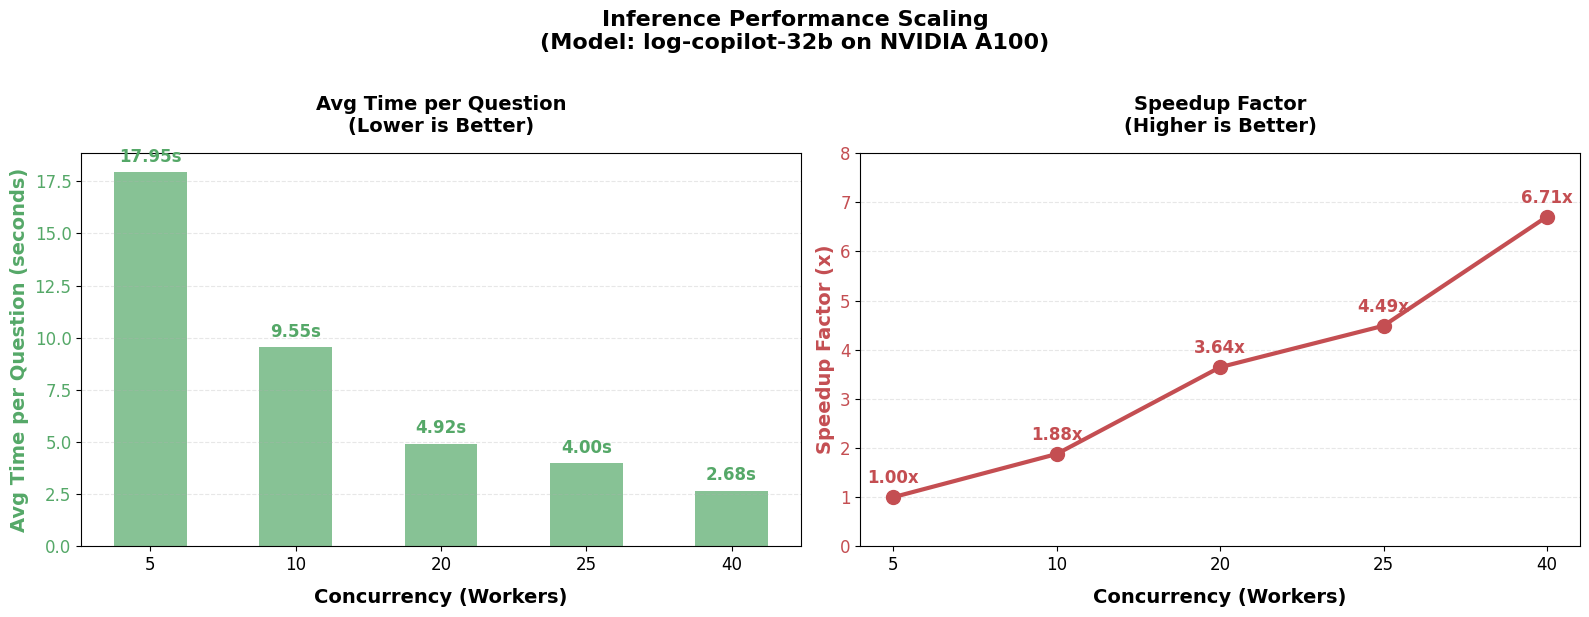

In [16]:
# === 2. 設定畫布：分成兩張圖 ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
plt.rcParams['font.family'] = 'sans-serif'

# --- 圖 1：平均每題時間 (長條圖) ---
color_avg = '#55a868'
ax1.set_xlabel('Concurrency (Workers)', fontsize=14, fontweight='bold', labelpad=10)
ax1.set_ylabel('Avg Time per Question (seconds)', color=color_avg, fontsize=14, fontweight='bold')
bars = ax1.bar(concurrency, avg_time_per_question, color=color_avg, alpha=0.7, width=0.5)
ax1.tick_params(axis='y', labelcolor=color_avg, labelsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.3)
ax1.set_title('Avg Time per Question\n(Lower is Better)', fontsize=14, fontweight='bold', pad=15)

# 在長條圖上方標示數值
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.3,
             f'{height:.2f}s',
             ha='center', va='bottom', fontsize=12, fontweight='bold', color=color_avg)

# --- 圖 2：加速倍率 (折線圖) ---
color_speed = '#c44e52'
ax2.set_xlabel('Concurrency (Workers)', fontsize=14, fontweight='bold', labelpad=10)
ax2.set_ylabel('Speedup Factor (x)', color=color_speed, fontsize=14, fontweight='bold')
ax2.plot(concurrency, speedup, color=color_speed, marker='o', markersize=10, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color_speed, labelsize=12)
ax2.tick_params(axis='x', labelsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.3)
ax2.set_ylim(0, 8.0)
ax2.set_title('Speedup Factor\n(Higher is Better)', fontsize=14, fontweight='bold', pad=15)

# 在折線點上方標示數值
for i, txt in enumerate(speedup):
    ax2.text(i, speedup[i] + 0.2,
             f'{txt:.2f}x',
             ha='center', va='bottom', fontsize=12, fontweight='bold', color=color_speed)

# === 3. 標題與排版 ===
fig.suptitle('Inference Performance Scaling\n(Model: log-copilot-32b on NVIDIA A100)', 
             fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()